# Forecasting Cryptocurrency prices

#В приведенном ниже проекте мы постарались погрузиться в мир криптовалют с разных сторон: составили модель линейной регрессии для оценки Marketcap и рассмотрели корреляцию между разными криптовалютами, получив некоторые выводы. Market capitalization - общая стоимость, рассчитанная на основе текущей цены. Чтобы посчитать капитализацию, мы умножаем стоимость одного биткоина на общее количество биткоинов на рынке

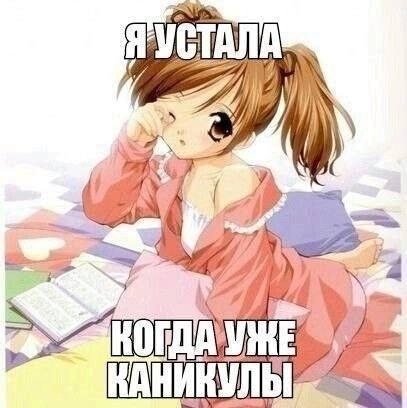

# 1) Попробуем создать модель,предсказывающую Marketcap криптовалюты BTC.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [4]:
bitcoin=pd.read_csv("coin_Bitcoin.csv")

In [5]:
bitcoin.drop(["Name"],axis=1, inplace=True)
bitcoin.drop(["SNo"],axis=1, inplace=True)
bitcoin.drop(["Symbol"],axis=1, inplace=True)
bitcoin.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], dtype='object')

In [6]:
import datetime as dt
bitcoin["Date"]=pd.to_datetime(bitcoin["Date"])
bitcoin['Date_year'] = bitcoin["Date"].dt.year
bitcoin['Date_month'] = bitcoin["Date"].dt.month
bitcoin['Date_day'] = bitcoin["Date"].dt.day
bitcoin['Date_hour'] = bitcoin["Date"].dt.hour
bitcoin['Date_minute'] = bitcoin["Date"].dt.minute
bitcoin['Date_seconde'] = bitcoin["Date"].dt.second

In [7]:
bitcoin.drop(["Date"], axis=1, inplace=True)

In [8]:
X=bitcoin.drop(["Marketcap"], axis=1)
Y=bitcoin["Marketcap"]


# В контексте задачи прогнозирования цены биткоина уместно будет использовать модель линейной регрессии (логистическая регрессия не является подходящим выбором,так как она используется для задач классификации,которые требуют предсказать вероятность принадлежности к определенным категориям или классам.

## В данном случае использование accuracy_score не подходит для оценки качества модели, так как это метрика для задач классификации, а не для задачи регрессии.Вместо него воспользуемся коэффициент детерминации (R^2), который показывает, насколько успешно модель "подходит" к нашим данным:  
## Формула для R^2:

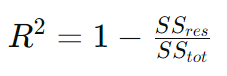

где $SSres$ - сумма квадратов остатков (расстояние между фактическими значениями и предсказанными значениями), а $SStot$- общая сумма квадратов (расстояние между фактическими значениями и средним значением целевой переменной).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print("Точность модели (коэффициент детерминации):", accuracy)


Точность модели (коэффициент детерминации): 0.9993581798331199


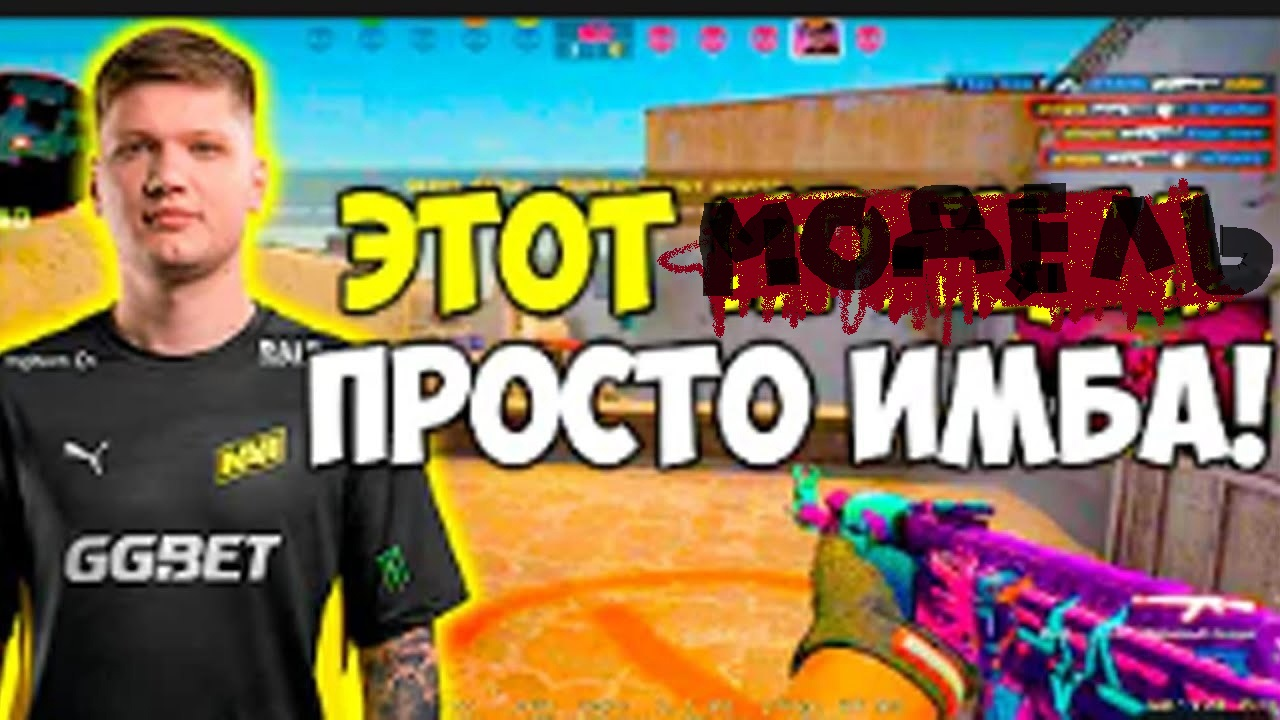

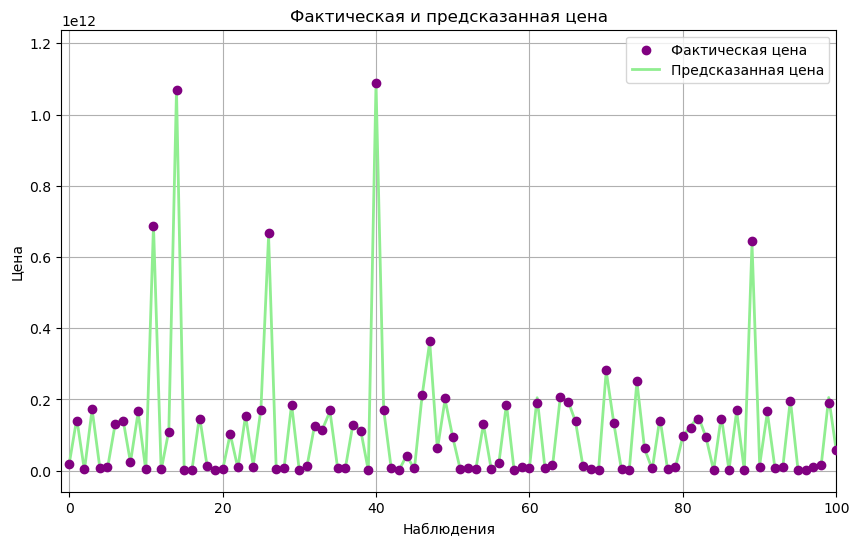

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='purple', alpha=1, label='Фактическая цена', zorder = 1000)
plt.plot(range(len(y_test)), y_pred, color='lightgreen', linewidth=2, label='Предсказанная цена')

plt.xlabel('Наблюдения')
plt.ylabel('Цена')
plt.title('Фактическая и предсказанная цена')
plt.legend()
plt.grid(True)
plt.xlim(-1, 100)

plt.show()

# Количество наблюдений можно и повысить, просто тогда график станет менее наглядным.

# Коэффициент детерминации близок к 1, что свидетельствует о том,что  модель линейной регрессии хорошо соотносится с данными и хорошо объясняет изменчивость целевой переменной,однако это не повод инвеcтировать в криптовалюту (у кого то это щелкает, а у кого то это не щелкает), так как наша модель хорошо работает только на тестовых данных, но не обобщается на новые (это конечно печально)
# Сама модель описывает не все факторы, влияющие на цену биткоина, но ее огромный плюс в наглядности и относительной простоте. Рынок криптовалюты крайне сложен и подвержен множеству внешних воздействий, которые никак не описать, поэтому наша модель остается достаточно эффективной

#2) Изучим корреляцию стоимости разных криптовалют

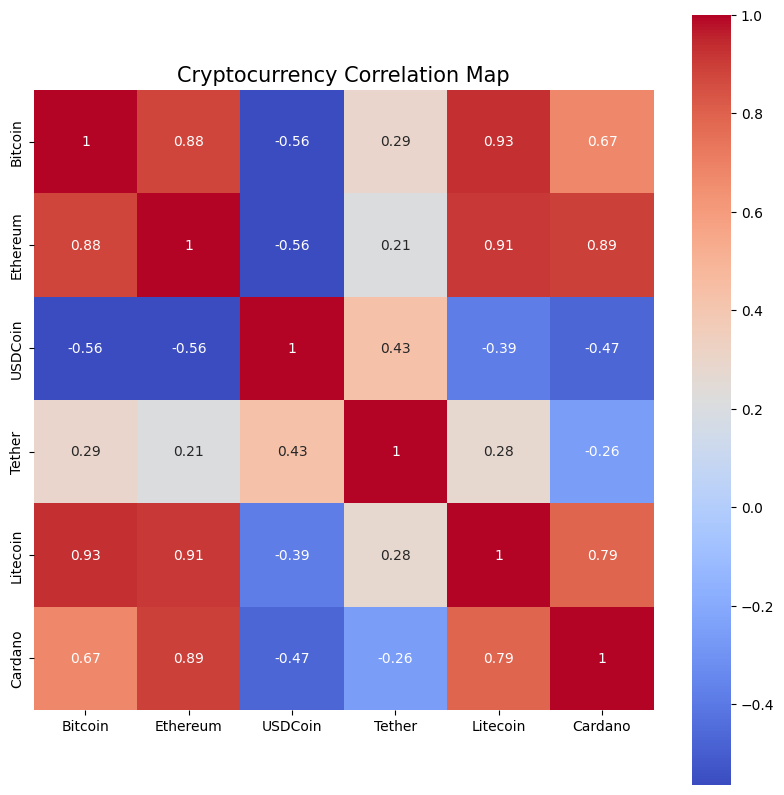

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files_to_use = ["coin_Bitcoin.csv", "coin_Ethereum.csv", "coin_USDCoin.csv", "coin_Tether.csv","coin_Litecoin.csv", "coin_Cardano.csv"]

# Создаем пустой датафрейм, в который будем добавлять данные
df = pd.DataFrame()

for filename in files_to_use:
    currency_name = filename.split("_")[1].split(".")[0]  # Извлекаем название криптовалюты из имени файла
    temp_df = pd.read_csv(filename, usecols=["Date", "Close"], parse_dates=["Date"])
    temp_df.columns = ["Date", currency_name]

    if df.empty:
        df = temp_df
    else:
        # Объединяем датафреймы по столбцу "Date", используя объединение по индексу
        df = df.merge(temp_df, on="Date", how="outer")



# Используем тест ранговой корреляции Спирмена
corrmat = df.corr(method='spearman')

# Создаем тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat.drop(columns=["Date"]).drop(index=["Date"]), vmax=1., square=True, annot=True, cmap="coolwarm")
plt.title("Cryptocurrency Correlation Map", fontsize=15)
plt.show()

#Что нам дает эта матрица? На самом деле, очень много. Представим, что мы составляем диверсифицированный портфель из разных криптовалют. Тогда вкладывать в криптовалюты с положительной корреляцией рискованно, и риск тем больше, чем ближе значение к 1. И наоборот, инвестирование в криптовалюты с меньшей корреляцией заметно снизит риск. Например, если часть нашего капитала уже вложена в BitCoin, то логичнее далее инвестировать не в Etherium или Cardano, а в USDCoin.

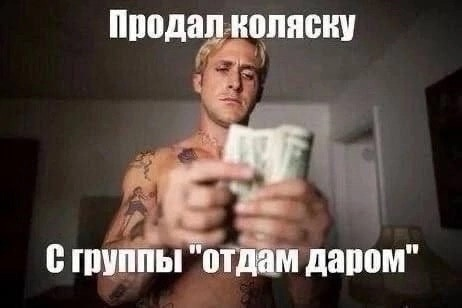

# В ходе работы мы получили очень интересные выводы: оказывается, что такая простая и знакомая нам модель линейной регресии очень даже хорошо нам подходит, и оценивает значения с высокой точностью. К тому же, мы узнали зачем все-таки нужна корреляционная матрица - оказывается она может быть применима даже в реальной жизни для оценки риска.